In [1]:
import numpy as np
import timeit
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [8]:
# Simulation parameters
nx = 1000                   # number of grid points (DO NOT CHANGE THIS - the output prepender does NOT like it!)
L = 2.5                     # domain length
X = np.linspace(0, L, nx)   # position along the domain
h = L / nx                  # spacing b/w grid points
t = 100                     # time period of solving
nt = 1000                   # time steps to divide total time into
alpha = 0.001               # diffusivity constant for diffusion equation
gamma = 0.02                # pressure sensitivity
u_0 = 100.0                 # BC1
u_end = 1.0                 # BC2

In [9]:
def odefunc(t, u):
    dudt = np.zeros(u.shape)
    dudt[0] = 0  # no flux boundary condition
    dudt[-1] = 0  # no flux boundary condition
    # Internal nodes
    for i in range(1, nx-1):
        dudt[i] = alpha * gamma * u[i] * (u[i + 1] - 2 * u[i] + u[i - 1]) / h**2
    return dudt

# Initial condition with boundary conditions
init = np.exp(u_end * np.ones(X.shape) * gamma) / gamma  # Initialize the pressure vector
init[0] = np.exp(u_0 * gamma) / gamma  # Boundary condition at one end
init[-1] = np.exp(u_end * gamma) / gamma  # Boundary condition at the other end

# Time span for the solver
tspan = (0, t)
teval = np.linspace(0, t, nt)

# Solve the ODE
start = timeit.default_timer()
sol = solve_ivp(odefunc, tspan, init, method='BDF', t_eval=teval)
stop = timeit.default_timer()

# Process the solution
sol_use = np.transpose(sol.y)
pxt = np.log(sol_use * gamma) / gamma
comp_time = stop - start

In [10]:
with open('pressure_profile.dat', 'wb') as file:
    for i, time_point in enumerate(teval):
        # Storing time, radial position, and pressure
        data = np.column_stack((X, pxt[:, i]))
        # Prepend time to each row
        data = np.column_stack((np.full(X.shape, time_point), data))
        # Write to file
        data.tofile(file)

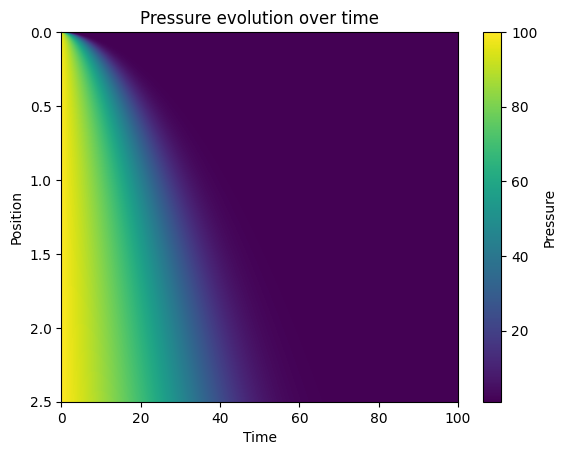

In [11]:
# Optionally plot the results
plt.imshow(pxt, extent=[0, t, X[-1], X[0]], aspect='auto')
plt.colorbar(label='Pressure')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Pressure evolution over time')
plt.show()

Text(0, 0.5, 'Pressure')

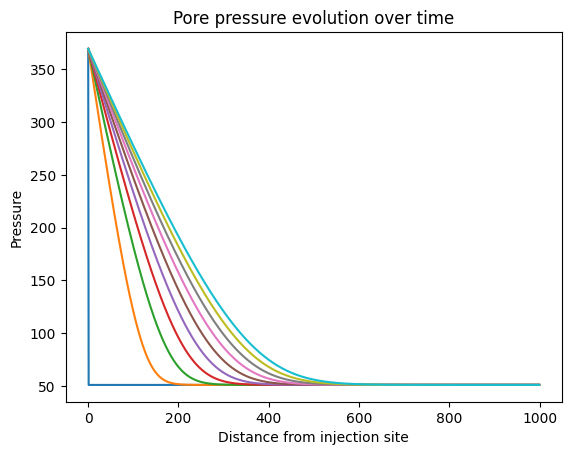

In [12]:
skip_size = 100
plt.title("Pore pressure evolution over time")
for i in range(int(nt/skip_size)):
    plt.plot(sol_use[i*skip_size])
plt.xlabel("Distance from injection site")
plt.ylabel("Pressure")